# <b>Klasifikasi</b>

Berikut adalah beberapa algoritma yang umum digunakan dalam klasifikasi:
- Random Forest
- Logistic Regression
- K-Nearest Neighbor (K-NN)

Selain itu, evaluasi model klasifikasi juga penting untuk memastikan performa model:
- Evaluation Metrics (Klasifikasi)

### <b>Random Forest</b>

<p>
Random Forest adalah algoritma Machine Learning berbasis metode ensemble yang menggabungkan banyak Decision Tree untuk membuat prediksi yang lebih akurat dan stabil. Setiap pohon dalam Random Forest dilatih pada subset data yang berbeda. Klasifikasi akhir ditentukan berdasarkan hasil voting dari pohon-pohon tersebut.

<b>Keunggulan Random Forest</b>
<ul>
    <li>Dapat digunakan untuk tugas klasifikasi dan regresi.</li>
    <li>Mengurangi risiko overfitting dengan menggunakan banyak Decision Tree.</li>
    <li>Mampu menangani dataset besar dengan banyak fitur.</li>
    <li>Memberikan ukuran kepentingan fitur, yang membantu dalam analisis variabel penting dalam model.</li>
    <li>Digunakan di berbagai bidang seperti keuangan, kesehatan, pemasaran, dan olahraga.</li>
</ul>

<b>Cara Kerja Random Forest</b>
<ol>
    <li><b>Bootstrap Aggregating (Bagging)</b>: Membuat beberapa Decision Tree dengan data sampel yang dipilih secara acak (dengan penggantian).</li>
    <li><b>Decision Tree</b>: Setiap pohon keputusan dilatih menggunakan subset fitur yang berbeda.</li>
    <li><b>Prediksi</b>: Setiap pohon memberikan prediksi berdasarkan data baru.</li>
    <li><b>Majority Voting</b>: Untuk tugas klasifikasi, hasil prediksi ditentukan berdasarkan suara mayoritas dari semua pohon.</li>
</ol>
</p>

<p align="center">
    <img src="../images/majority_vote.png" width='50%'>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../dataset/storedata.csv")

In [3]:
# preprocessing sudah di modul kemarin ini skip aja
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder

num_imputer = SimpleImputer(strategy="mean")
df["Competition score"] = num_imputer.fit_transform(df[["Competition score"]])
df.drop(columns="Manager name", inplace=True)

X = df.drop(columns=["Performance"])
y = df["Performance"]

categorical_imputer = SimpleImputer(strategy="most_frequent")

cols = ["Location", "Car park"]

for col in cols:
    df[col] = categorical_imputer.fit_transform(df[[col]]).squeeze()
    
le = LabelEncoder()
lb = LabelBinarizer()
oh = OneHotEncoder()

def handle_encoding(df, method, columns):
    if method == oh:
        for column in columns:
            df_transformed = oh.fit_transform(df[[column]]).toarray()
            df_encoded = pd.DataFrame(
                df_transformed, columns=oh.get_feature_names_out([column])
            )
            df = pd.concat([df, df_encoded], axis=1).drop(columns=column)
    else:
        for column in columns:
            df[column] = method.fit_transform(df[column])

    return df


df = handle_encoding(df, le, ["Country", "Location", "Town"])
df = handle_encoding(df, oh, ["Car park"])
df = handle_encoding(df, lb, ["Performance"])

from feature_engine.outliers import Winsorizer

windsorizer = Winsorizer(
    capping_method="iqr",
    tail="both",
    fold=1.5,
    variables=["10 min population", "20 min population", "30 min population"],
)

windsorizer.fit(df)
df = windsorizer.transform(df)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pastikan X dan y sudah terdefinisi dengan benar
X = df.drop(columns=["Performance"])
y = df["Performance"]

# Split dataframe menjadi data testing dan training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Pastikan tidak ada tipe data object
if X_train.select_dtypes(include=['object']).shape[1] > 0:
    raise ValueError("Masih ada kolom bertipe object dalam X_train!")

# Scaling
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [5]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (
    mean_squared_error,
    accuracy_score,
    classification_report,
    precision_recall_fscore_support,
    confusion_matrix,
)
from sklearn.ensemble import RandomForestClassifier

import warnings

warnings.filterwarnings("ignore")

In [6]:
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test) # prediksi data test

In [7]:
model_accuracy = accuracy_score(pred, y_test)

print("Nilai akurasi untuk base model: ", model_accuracy)

Nilai akurasi untuk base model:  0.5714285714285714


In [8]:
pred # prediksi

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0])

In [9]:
y_test # data asli

73     1
45     1
60     1
42     0
128    1
62     0
12     1
81     0
19     1
64     0
44     1
51     0
26     1
36     1
31     0
40     1
132    0
105    1
4      0
112    0
120    0
126    0
27     1
16     1
18     1
10     1
66     1
69     1
Name: Performance, dtype: int64

In [10]:
conf_matrix = confusion_matrix(y_test, pred) 

print(conf_matrix)

[[10  1]
 [11  6]]


In [11]:
20 / 28 * 100

71.42857142857143

### <b>Logistic Regression</b>

<p>Regresi logistik adalah metode analisis statistik yang digunakan untuk memprediksi hasil biner berdasarkan pengamatan sebelumnya terhadap kumpulan data. Ini adalah algoritme klasifikasi yang digunakan untuk menghitung probabilitas terjadinya peristiwa biner dan untuk menangani masalah klasifikasi. Regresi logistik digunakan untuk memprediksi kemungkinan semua jenis hasil "ya" atau "tidak", seperti memprediksi apakah email yang masuk adalah spam atau bukan spam, atau memprediksi apakah transaksi kartu kredit adalah penipuan atau bukan penipuan. Regresi logistik penting karena mengubah perhitungan yang rumit seputar probabilitas menjadi masalah aritmatika yang mudah.</p>

<h4>Cara Kerja</h4>

![log_reg.png](../images/log_reg.png)

<p>Regresi logistik menggunakan fungsi logistik (atau fungsi sigmoid) untuk memodelkan probabilitas. Fungsi sigmoid memiliki bentuk kurva S dan dapat mengubah setiap nilai input ke dalam rentang antara 0 dan 1, yang bisa diartikan sebagai probabilitas.</p>

<p>Di mana z adalah kombinasi linier dari fitur (variabel independen)</p>

![log_reg_eq.png](../images/log_reg_eq.png)

<p><b>Estimasi Koefisien</b>: Tujuan dari regresi logistik adalah untuk menemukan koefisienβ yang terbaik, sehingga model dapat memprediksi probabilitas dengan akurat. Ini dilakukan dengan memaksimalkan fungsi log-likelihood dengan teknik seperti "gradient descent".</p>

<p><b>Ambang Batas (Threshold)</b>: Meskipun regresi logistik memberikan probabilitas, dalam banyak kasus kita perlu keputusan kategorikal sebagai hasil akhir (misalnya, spam atau bukan spam). Untuk itu, kita menetapkan ambang batas. Pada klasifikasi biner, ambang batas yang umumnya digunakan adalah 0,5:

<ul>    
    <li>Jika P(Y=1)>0,5, maka prediksi adalah kelas 1.</li>
    <li>Jika P(Y=1)≤0,5, maka prediksi adalah kelas 0.</li>
</ul>
</p>

In [12]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris = load_iris()

X2 = iris.data
y2 = (iris.target == 0).astype(int)  # Convert to binary: 1 if 'setosa', 0 otherwise

In [13]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

In [14]:
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [15]:
# instantiate the model
clf = LogisticRegression(random_state=42)
clf.fit(X2_train_scaled, y2_train)

LogisticRegression(random_state=42)

In [16]:
y2_pred = clf.predict(X2_test_scaled)

In [17]:
print("Model accuracy score: {0:0.4f}".format(accuracy_score(y2_test, y2_pred)))

Model accuracy score: 1.0000


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### <b>K-Nearest Neighbor (K-NN)</b>

<p>
K-nearest neighbors (K-NN) adalah algoritma machine learning yang dapat digunakan untuk tugas klasifikasi dan regresi. Algoritma ini merupakan algoritma non-parametrik, yang berarti bahwa algoritma ini tidak membuat asumsi apa pun tentang distribusi data. Sebaliknya, algoritma ini menggunakan seluruh kumpulan data untuk membuat prediksi. Berikut adalah beberapa detail tambahan tentang K-NN:

<ul>
    <li>K-NN bekerja dengan menemukan K neighbour terdekat ke titik data yang diberikan berdasarkan metrik jarak seperti jarak Euclidean atau jarak Manhattan.</li>
    <li>Nilai K adalah hyperparameter yang dapat disetel untuk meningkatkan akurasi model. Nilai K yang lebih kecil akan menghasilkan model yang lebih fleksibel yang lebih rentan terhadap overfitting, sementara nilai K yang lebih besar akan menghasilkan model yang lebih kaku yang lebih rentan terhadap underfitting.</li>
    <li>K-NN dapat digunakan untuk tugas klasifikasi dan regresi. Dalam klasifikasi, outputnya adalah label kelas, sedangkan dalam regresi, outputnya adalah nilai kontinu.</li>
    <li>K-NN sensitif terhadap pilihan metrik jarak dan penskalaan data. Penting untuk melakukan preprocessing data sebelum menerapkan K-NN untuk memastikan hasilnya akurat.</li>
</ul>
</p>

In [19]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

X3, y3 = make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=1.5)
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.3, random_state=42
)

In [20]:
feature_columns = [f"Feature_{i+1}" for i in range(X3_train.shape[1])]
df_train = pd.DataFrame(X3_train, columns=feature_columns)
df_train["Label"] = y3_train

df_train.head()

,Feature_1,Feature_2,Label
0,3.292257,2.711048,1
1,-2.421885,7.299831,0
2,6.391552,2.354801,1
3,4.448002,0.539859,1
4,4.540759,0.156645,1


In [21]:
scaler = StandardScaler()
X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.transform(X3_test)

In [22]:
# Membuat model KNN dan melatihnya
k = 3
model2 = KNeighborsClassifier(n_neighbors=k)
model2.fit(X3_train, y3_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
y3_pred = model2.predict(X3_test)

In [24]:
accuracy = accuracy_score(y3_test, y3_pred)
print(f"\nAkurasi Model: {accuracy * 100:.2f}%")


Akurasi Model: 100.00%


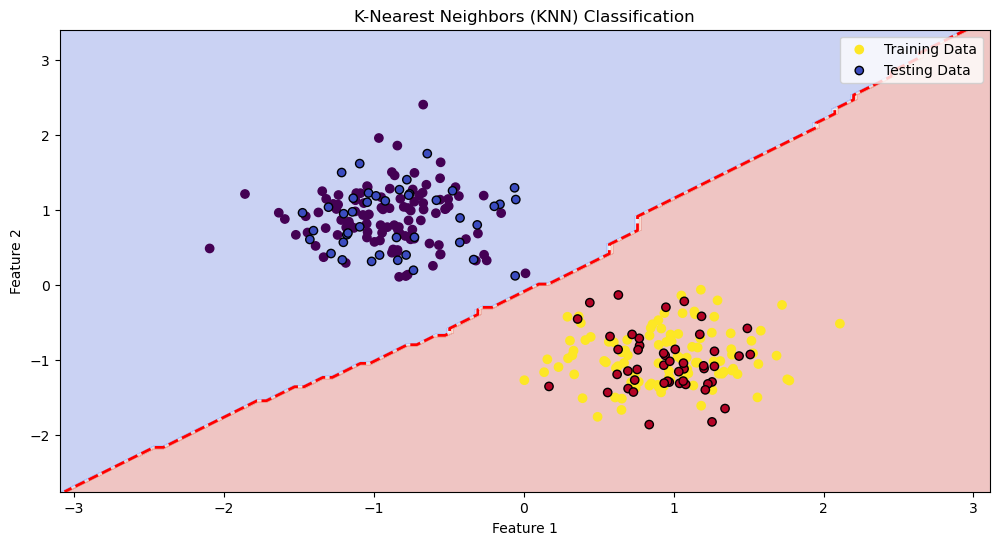

In [25]:
# Membuat grid untuk batas keputusan
x_min, x_max = X3_train[:, 0].min() - 1, X3_train[:, 0].max() + 1
y_min, y_max = X3_train[:, 1].min() - 1, X3_train[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100),
)

# Prediksi untuk setiap titik di grid
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 6))

# Plot Decision Boundary sebagai garis merah putus-putus
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors="red", linestyles="dashed")

# Plot Decision Boundary sebagai area berwarna transparan
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

# Memvisualisasikan data latih & uji
plt.scatter(X3_train[:, 0], X3_train[:, 1], c=y3_train, cmap="viridis", label="Training Data")
plt.scatter(X3_test[:, 0], X3_test[:, 1], c=y3_pred, cmap="coolwarm", edgecolors="black", label="Testing Data")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Nearest Neighbors (KNN) Classification")
plt.legend()
plt.show()

In [26]:
conf_matrix2 = confusion_matrix(y3_test, y3_pred)

print(conf_matrix2)

[[42  0]
 [ 0 48]]


** **

## <b>Evaluation Metrics (Klasifikasi)</b>

<p align="center">
    <img src="../images/eval_metrics.png" width='750'>
</p>

src: https://www.kdnuggets.com/machine-learning-evaluation-metrics-theory-and-overview

<p>
    <ul>
        <li>
        <p><b>Accuracy:</b> Accuracy adalah metrik yang menunjukkan seberapa sering model membuat prediksi yang benar dibandingkan dengan seluruh jumlah prediksi. Metrik ini dihitung dengan membagi jumlah prediksi yang benar (True Positive + True Negative) dengan total keseluruhan data. Meskipun mudah digunakan, accuracy kurang efektif jika dataset tidak seimbang, karena bisa memberikan hasil tinggi meskipun hanya memprediksi kelas mayoritas.</p>
        </li>
        <li>
        <p><b>Precition:</b> Precision mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan seluruh prediksi positif yang dibuat model. Rumusnya adalah jumlah True Positive dibagi dengan jumlah True Positive ditambah False Positive. Metrik ini penting ketika biaya kesalahan positif tinggi, seperti pada kasus deteksi penyakit, di mana salah mendiagnosis orang sehat sebagai sakit bisa berbahaya.</p>
        </li>
        <li>
        <p><b>Recall:</b> Recall (atau Sensitivity) mengukur seberapa banyak data positif yang berhasil diprediksi dengan benar dibandingkan dengan seluruh data positif yang sebenarnya ada. Rumusnya adalah jumlah True Positive dibagi dengan jumlah True Positive ditambah False Negative. Metrik ini penting pada kasus di mana melewatkan deteksi positif berbahaya, seperti pada deteksi kanker atau penipuan</p>
        </li>
        <li>
        <p><b>F1-Score:</b> F1-Score adalah rata-rata harmonis antara precision dan recall, yang memberikan gambaran keseimbangan antara kedua metrik tersebut. F1-Score berguna ketika dataset tidak seimbang dan penting untuk mempertimbangkan baik precision maupun recall. Nilai F1-Score berkisar antara 0 hingga 1, di mana nilai 1 menunjukkan performa model yang sempurna.</p>
        </li>
    </ul>
</p>
